# Sakaguchi-Kuramoto model: Adding Phase Shifts to the Kuramoto Model

In [1]:
import jax; jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from jax import random
from jaxkuramoto import SakaguchiKuramoto, theory, odeint
from jaxkuramoto.solver import runge_kutta
from jaxkuramoto.distribution import Normal, Uniform

import matplotlib.pyplot as plt

## Sakaguchi-Kuramoto model
$$
\frac{\mathrm{d}\theta_i}{\mathrm{d}t} = \omega_i + \frac{K}{N}\sum_{j=1}^N \sin(\theta_j-\theta_i+\alpha)
$$

In [7]:
seed = 0

n_oscillator = 10**3
alpha = jnp.pi / 3.0
loc, scale = 0.0, 1.0
dist = Normal(loc, scale)
omegas = dist.sample(random.PRNGKey(seed), (n_oscillator,))
K = 3.0

In [8]:
t0, t1 = 0.0, 100.0
dt = 0.01

model = SakaguchiKuramoto(omegas, K, alpha)
init_thetas = random.uniform(random.PRNGKey(seed+1), shape=(n_oscillator,), maxval=2*jnp.pi)
sol = odeint(model.vector_fn, runge_kutta, t0, t1, dt, init_thetas, observable_fn=model.orderparameter)

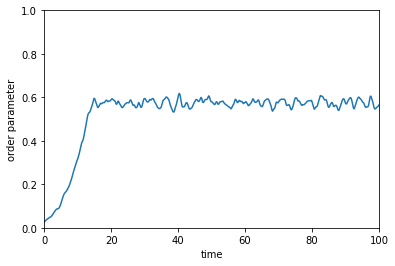

In [9]:
plt.xlabel("time")
plt.ylabel("order parameter")
plt.xlim(t0, t1)
plt.ylim(0, 1)
plt.plot(sol.ts, sol.observables)